In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
from cca.data_util import load_mocap_data

In [7]:
prefix = "/home/davidclark/Projects/ComplexityComponentsAnalysis/neuro_data/08_"
trial_names = [num+".amc" for num in ["01", "02", "03", "06", "08", "09", "10"]]
filenames = [prefix+name for name in trial_names]
datasets = [load_mocap_data(fname) for fname in filenames]

In [44]:
good_idx = np.ones(62, dtype=np.bool)
for X in datasets:
    good_idx *= (X.std(axis=0) > 1e-6)
    
N = np.sum(good_idx)

In [45]:
z_scored_datasets = []
for X in datasets:
    X_good = X[:, good_idx]
    X_z_score = (X_good - X_good.mean(axis=0))/X_good.std(axis=0)
    z_scored_datasets.append(X_z_score)

In [46]:
cov_mats = np.zeros((len(datasets), N, N))
for i in range(len(datasets)):
    cov_mats[i] = np.cov(z_scored_datasets[i].T)

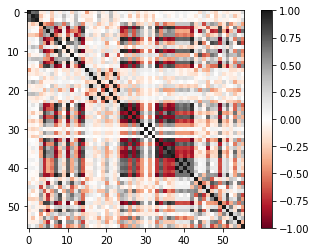

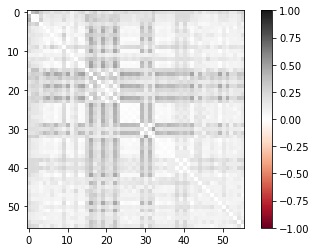

In [62]:
plt.imshow(cov_mats.mean(axis=0), cmap="RdGy", vmin=-1, vmax=1)
plt.colorbar()
plt.show()

plt.imshow(cov_mats.std(axis=0), cmap="RdGy", vmin=-1, vmax=1)
plt.colorbar()
plt.show()


In [63]:
concat_data = np.concatenate(z_scored_datasets, axis=0)

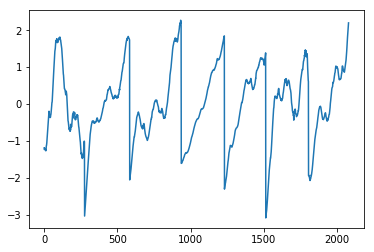

In [69]:
plt.plot(concat_data[:, 0])

In [68]:
concat_data.shape

(2079, 56)